# Plotly Express: a Walkthrough

This notebook is the executable version of the example we walk through in our [Medium announcement article](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) introducing [Plotly Express](https://plotly.github.io/plotly_express): a terse, consistent, high-level wrapper around Plotly.py for rapid data exploration and figure generation.

Once you import Plotly Express (aka `px`), most plots are made with just one function call that accepts a [tidy Pandas data frame](http://www.jeannicholashould.com/tidy-data-in-python.html), and a simple description of the plot you want to make. For example if you want a simple scatter plot, it’s just `px.scatter(data, x="column_name", y="column_name")`. Here’s an example with the [Gapminder dataset](https://www.gapminder.org/tools/#$state$time$value=2007;;&chart-type=bubbles) – which comes built-in! – showing life expectancy vs GPD per capita by country for 2007:


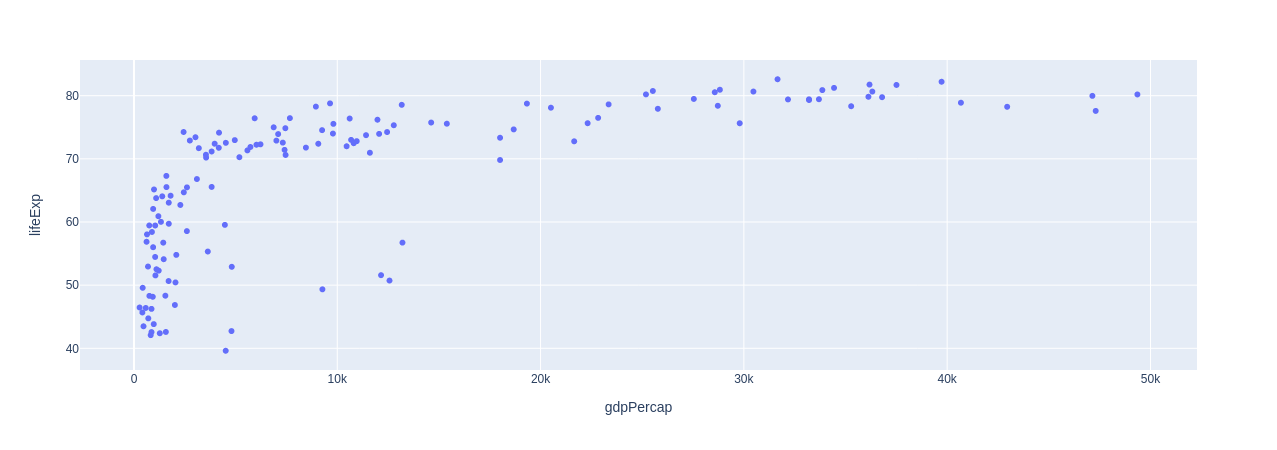

In [4]:
import plotly.express as px
gapminder = px.data.gapminder()
gapminder2007 = gapminder.query("year == 2007")

px.scatter(gapminder2007, x="gdpPercap", y="lifeExp")

If you want to break that down by continent, you can color your points with the `color` argument and `px` takes care of the details:

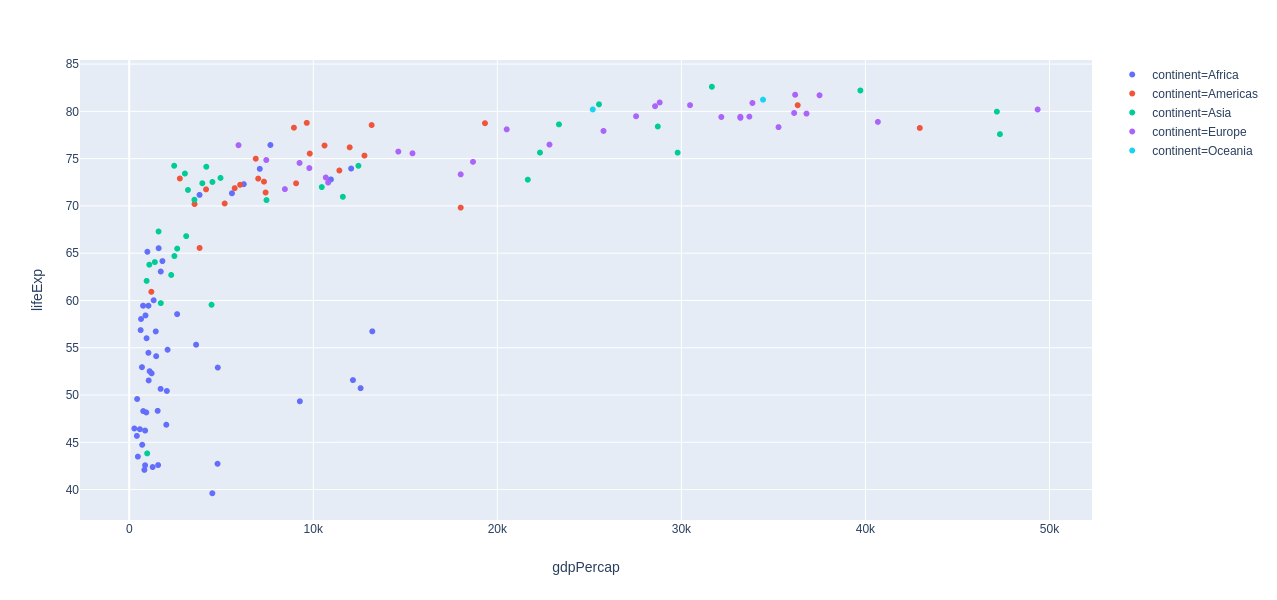

In [2]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent")

Each point here is a country, so maybe we want to scale the points by the country population… no problem: there’s an arg for that too!


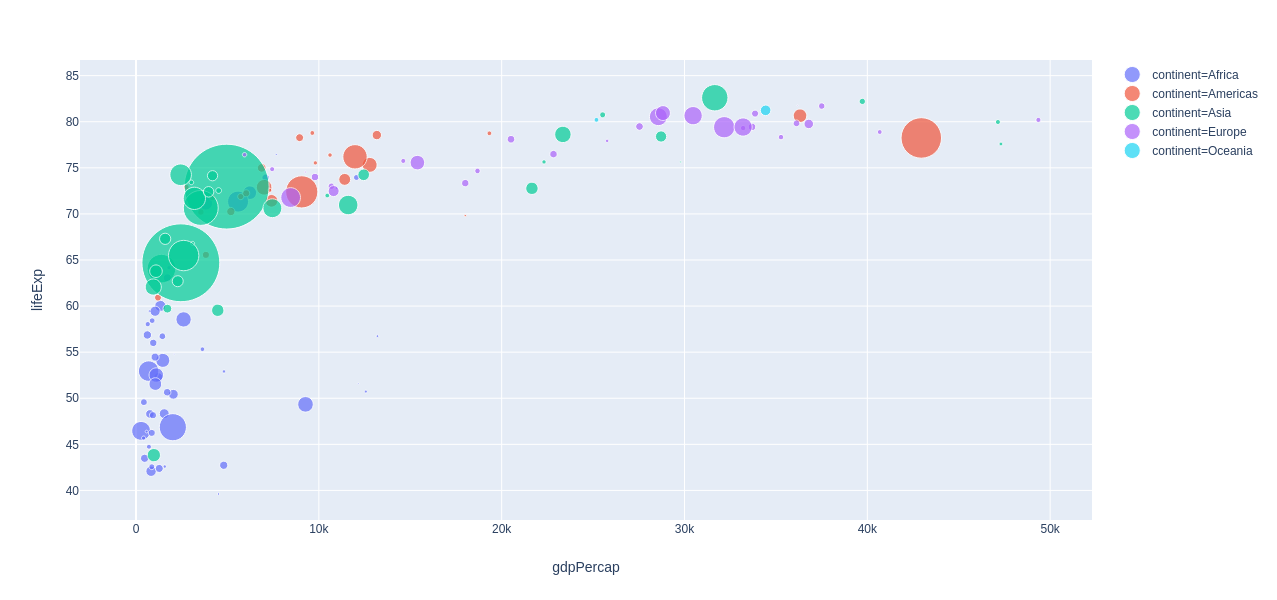

In [3]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60)

Curious about which point is which country? Add a `hover_name` and you can easily identify any point: never again wonder “what *is* that outlier?”... just mouse over the point you're interested in!

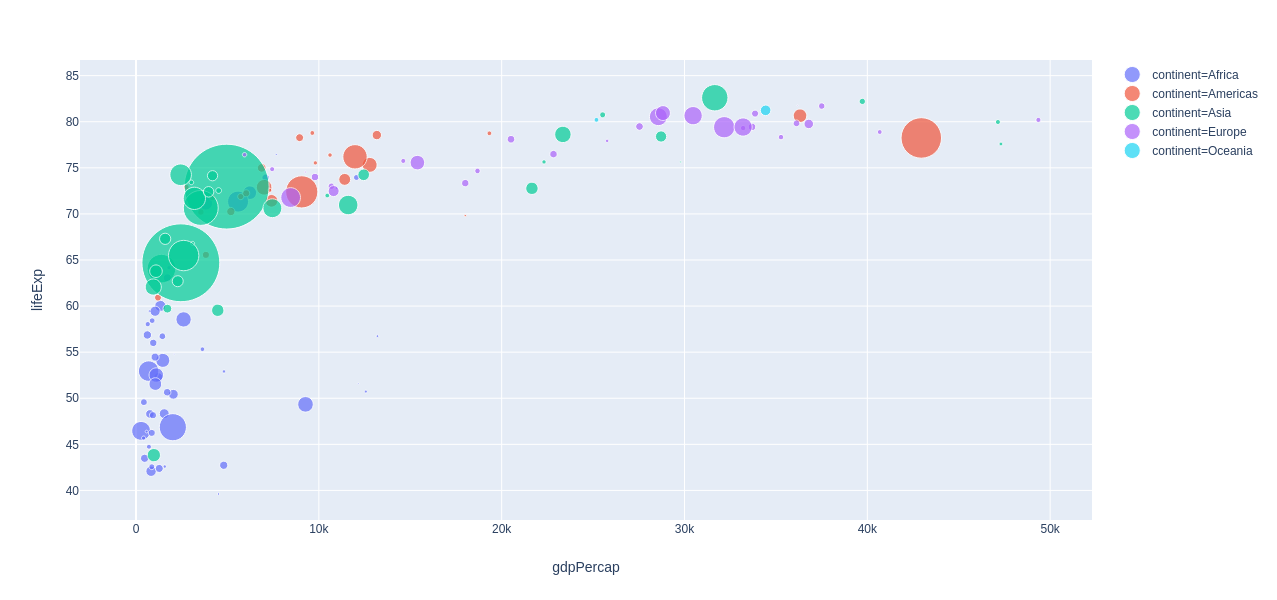

In [4]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60, hover_name="country")

You could facet your plots, just as easily as coloring your points with `facet_col="continent"`, and let's make the x-axis logarithmic to see things more clearly.

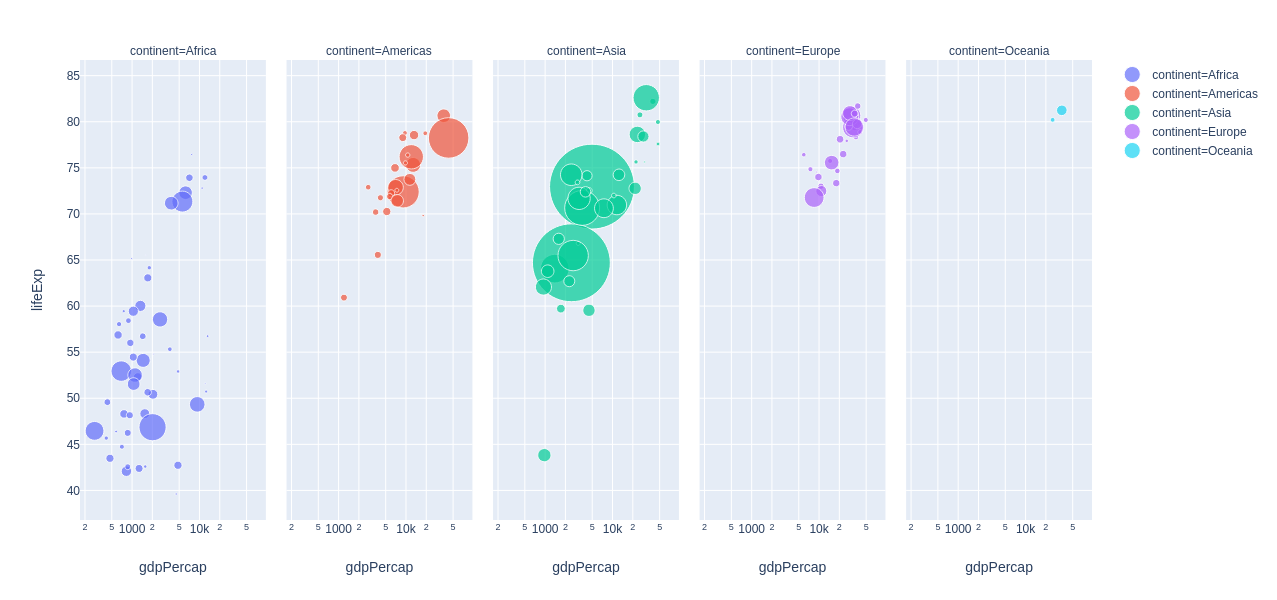

In [5]:
px.scatter(gapminder2007, x="gdpPercap", y="lifeExp", color="continent", size="pop", size_max=60,
          hover_name="country", facet_col="continent", log_x=True)

Maybe you're interested in more than just 2007 and you want to see how this chart evolved over time. You can animate it by setting `animation_frame="year"` and `animation_group="country"` to identify which circles match which ones across frames. In this final version, let's tweak some of the display here, as text like "gdpPercap" is kind of ugly even though it's the name of our data frame column. We can provide prettier `labels` that get applied throughout the figure, in legends, axis titles and hovers. We can also provide some manual bounds so the animation looks nice throughout:

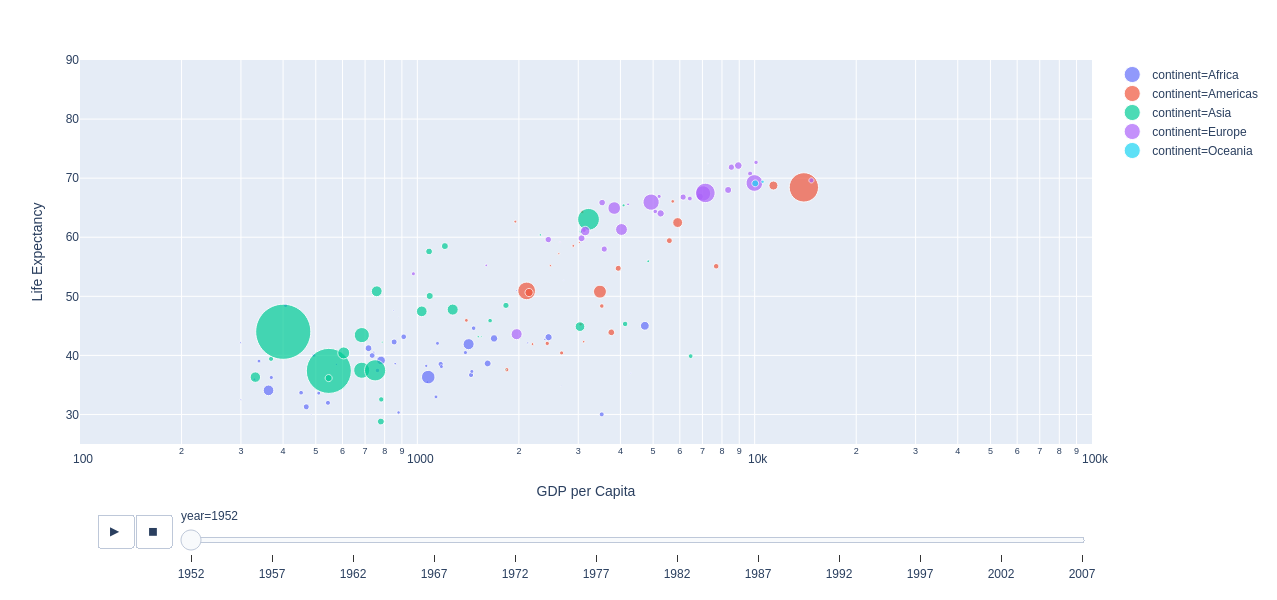

In [6]:
px.scatter(gapminder, x="gdpPercap", y="lifeExp",size="pop", size_max=60, color="continent", hover_name="country", 
           animation_frame="year", animation_group="country", log_x=True, range_x=[100,100000], range_y=[25,90],
           labels=dict(pop="Population", gdpPercap="GDP per Capita", lifeExp="Life Expectancy"))

Because this is geographic data, we can also represent it as an animated map, which makes it clear that `px` can make way more than just scatterplots, and that this dataset is missing data for the former Soviet Union.

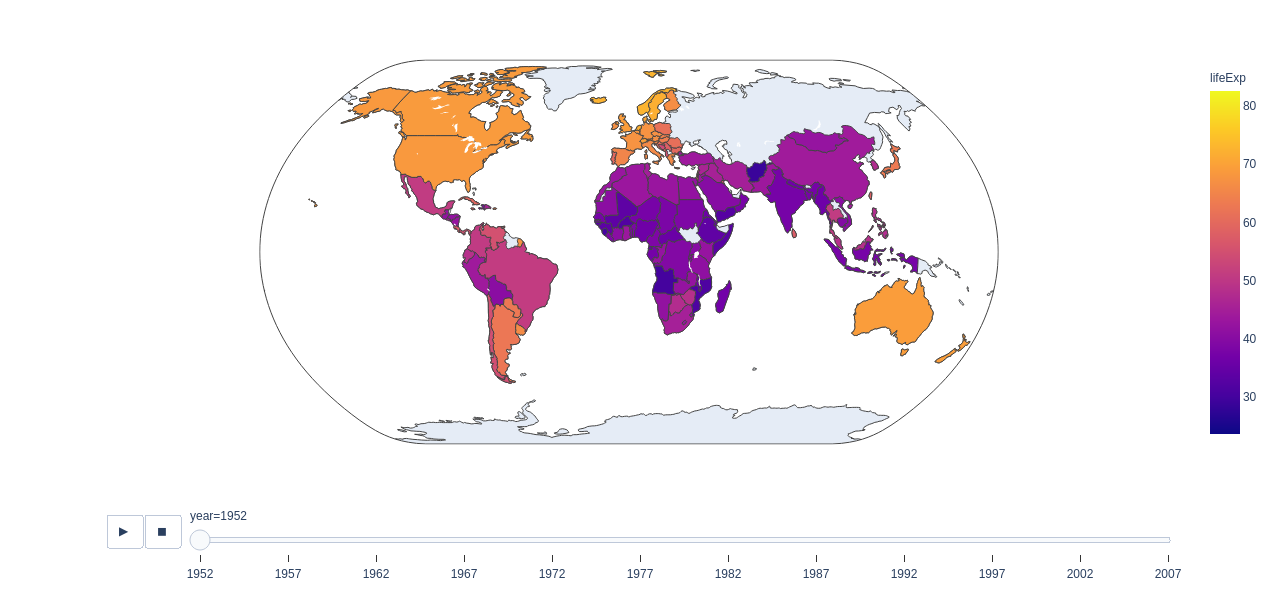

In [7]:
px.choropleth(gapminder, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year",
              color_continuous_scale=px.colors.sequential.Plasma, projection="natural earth")

A major part of data exploration is understanding the distribution of values in a dataset, and how those distributions relate to each other. Plotly Express includes a number of functions to do just that.
Visualize univariate distributions with histograms, box-and-whisker or violin plots:

In [8]:
tips = px.data.tips()

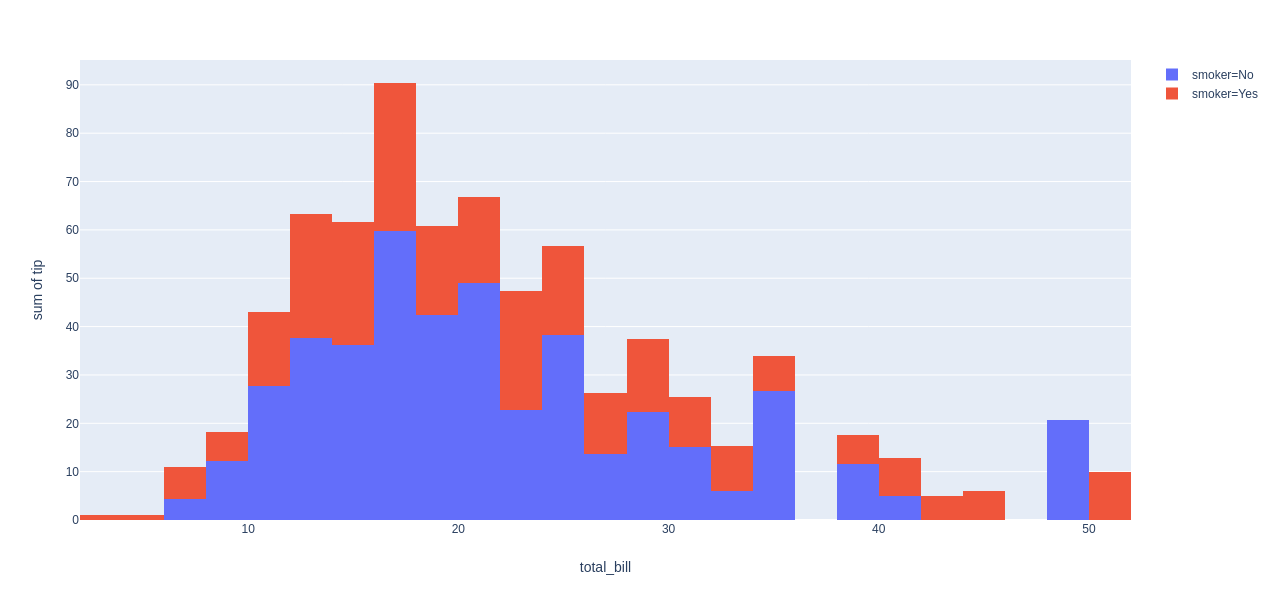

In [9]:
px.histogram(tips, x="total_bill", y="tip", histfunc="sum", color="smoker")

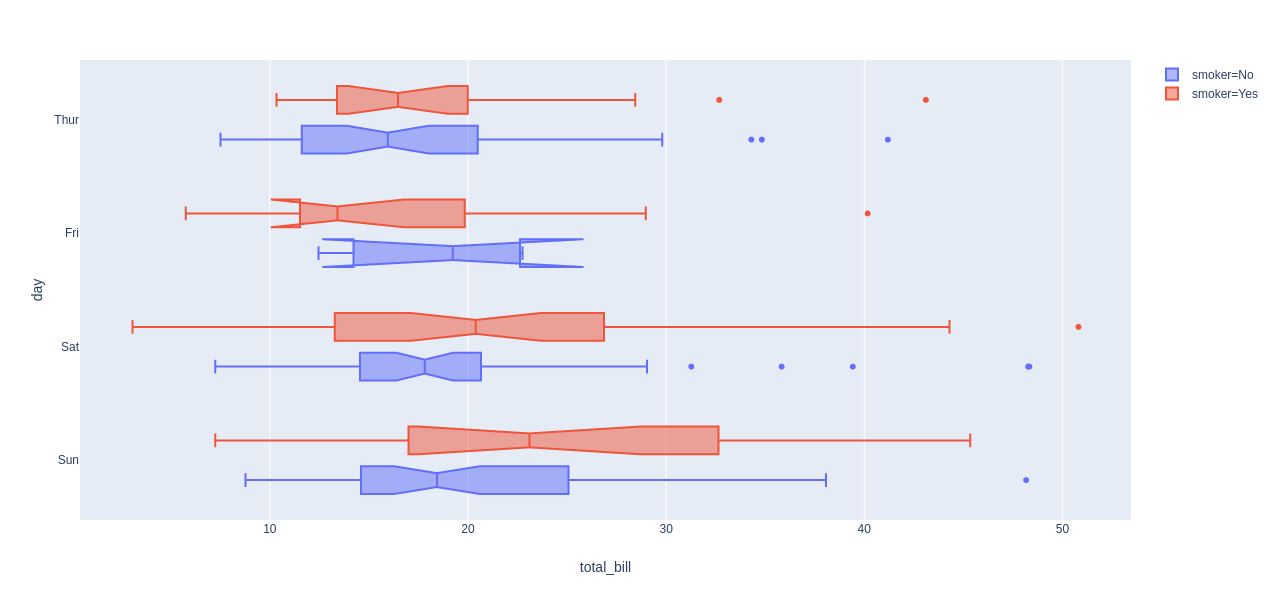

In [10]:
px.box(tips, x="total_bill", y="day", orientation="h", color="smoker", notched=True,
       category_orders={"day": ["Thur", "Fri", "Sat", "Sun"]})

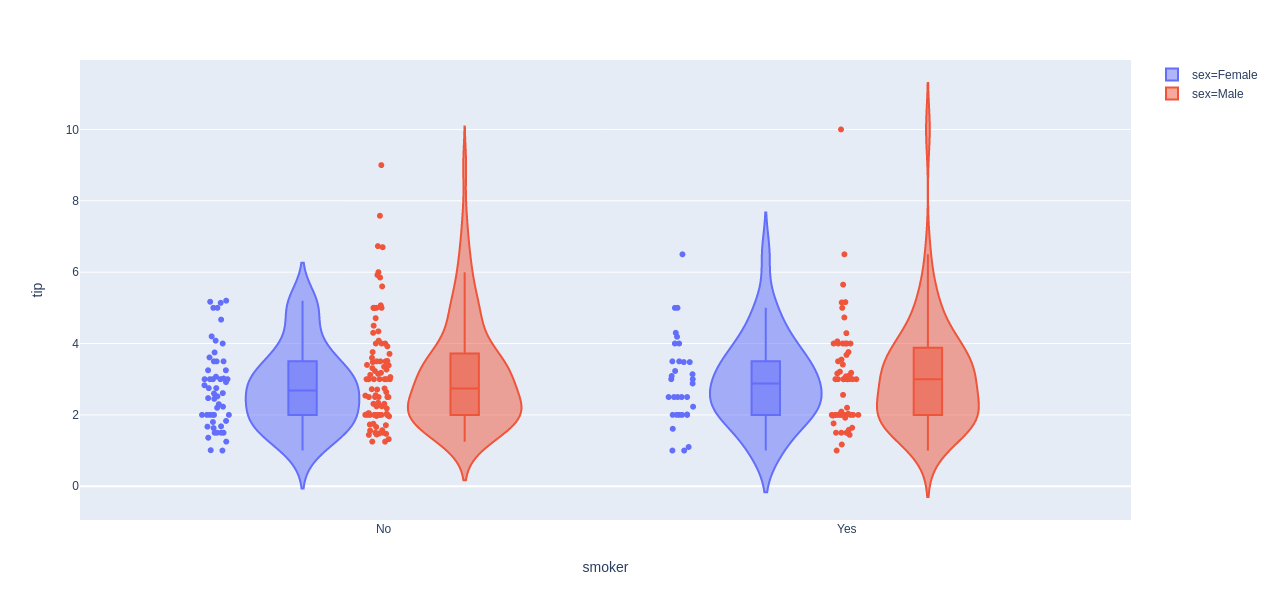

In [11]:
px.violin(tips, y="tip", x="smoker", color="sex", box=True, points="all")

You can also visualize bivariate distributions with marginal rugs, histograms, boxes or violins, and you can add trendlines too. px even helpfully adds the line's equation and R² in the hover box for you! It uses `statsmodels` under the hood to do either Ordinary Least Squares (OLS) regression or Locally Weighted Scatterplot Smoothing (LOWESS).

/home/pybokeh/envs/py3.7.2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



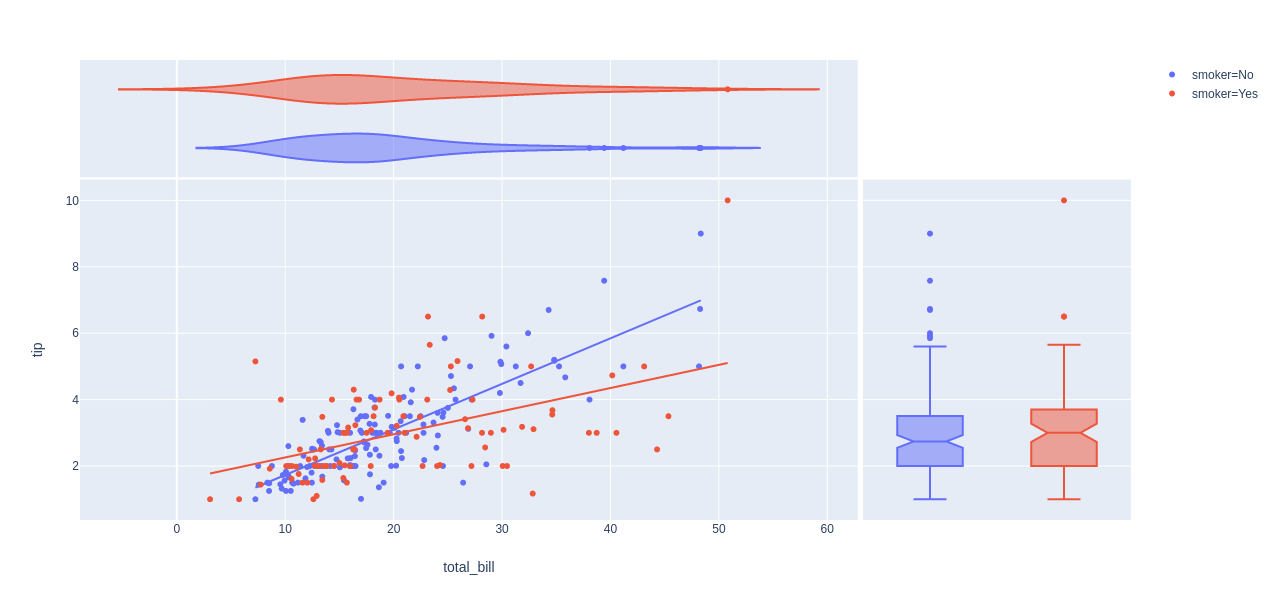

In [12]:
px.scatter(tips, x="total_bill", y="tip", color="smoker", trendline="ols", marginal_x="violin", marginal_y="box")

# Next steps

Phew, you've made it this far! If you want to use Plotly Express yourself, just `pip install plotly_express` to install it and head on over to our [reference documentation](https://plotly.github.io/plotly_express/plotly_express/) or just copy-paste from the examples above!

Or you could go back to our [Medium announcement article](https://medium.com/@plotlygraphs/introducing-plotly-express-808df010143d) for more details on this library.

In [12]:
from getpass import getpass

In [13]:
token = getpass("Enter your token: ")

Enter your token:  ·························································································


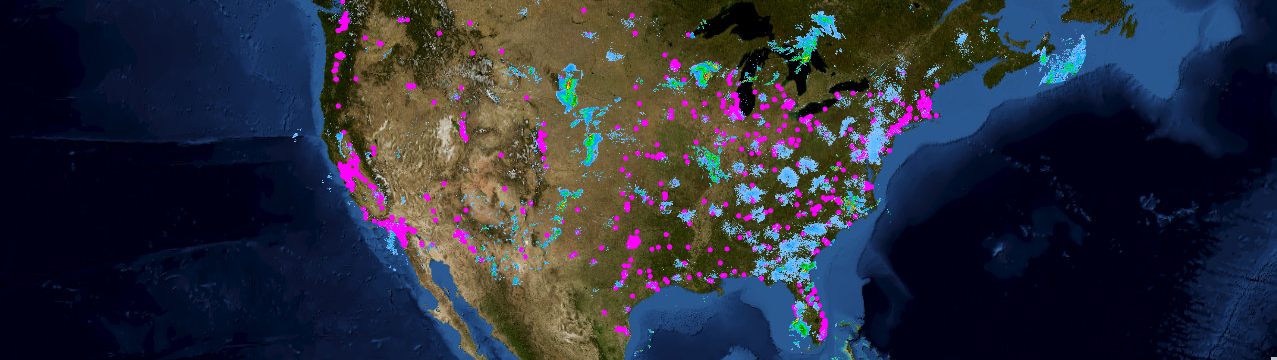

In [9]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        },
        {
            "sourcetype": "raster",
            "source": ["https://geo.weather.gc.ca/geomet/?"
                       "SERVICE=WMS&VERSION=1.3.0&REQUEST=GetMap&BBOX={bbox-epsg-3857}&CRS=EPSG:3857"
                       "&WIDTH=1000&HEIGHT=1000&LAYERS=RADAR_1KM_RDBR&TILED=true&FORMAT=image/png"],
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

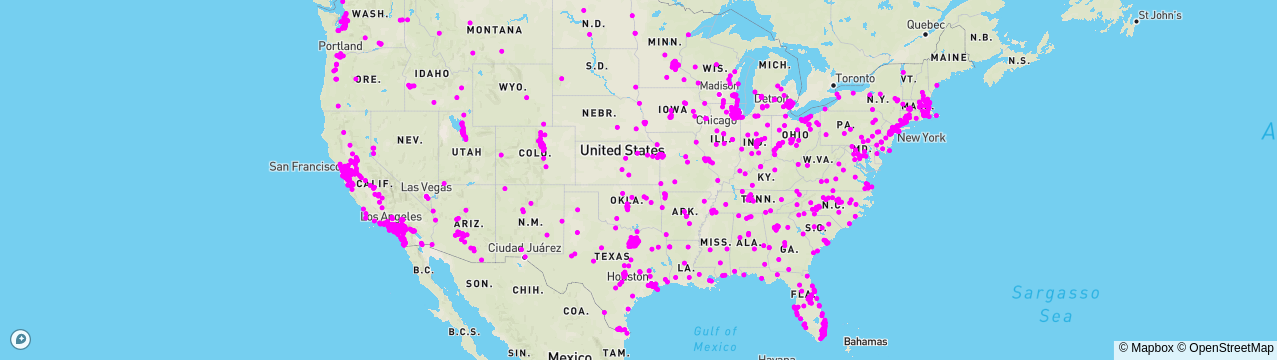

In [15]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="mapbox://styles/pybokeh/ckdmfl0u41jcg1imxbng7junw", mapbox_accesstoken=token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

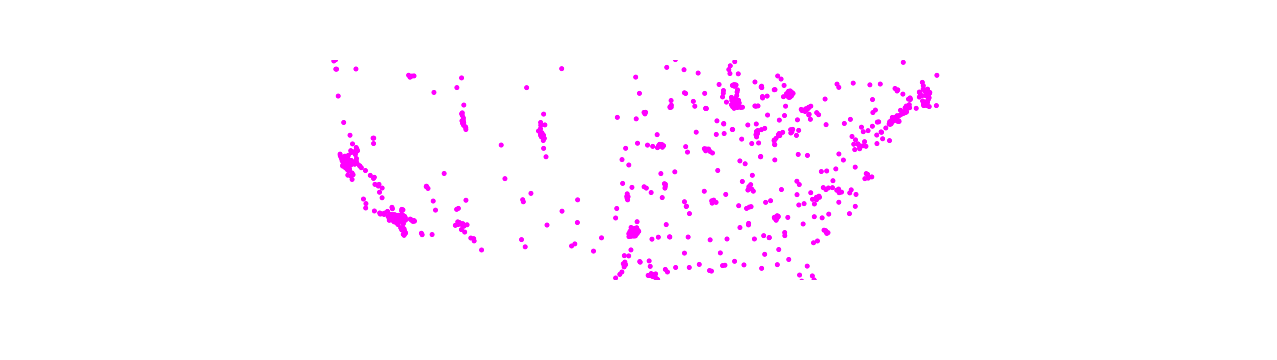

In [11]:
fig.show()